In [1]:
import pandas as pd
import plotly as pl
import seaborn as sb

In [2]:
dataset = pd.read_csv("data/disney_plus_titles.csv")

In [3]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


### This dataset has 1450 rows in 12 columns

In [4]:
dataset.shape

(1450, 12)

### Possible insights that can be uncovered from this dataset

- Titles volume by Year
- Which ratings prevail among Disney Plus titles in last 5 years
- What is the Movie to TV Show ratio on Disney Plus and how it changes over the years
- What is the share of Animated movies/shows on Disney Plus in Y2021

### Checking Nulls in columns

In [5]:
dataset.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

Some records have Nulls in 5 columns (director, cast, country, date_added, rating). Since we're not going to use cast or country in our analysis we can remove those columns from the dataset. As for director column we'll create separate sub-dataset with records with value in this column.
There are 3 records with missing date_added and 3 records with missing rating. Since it is a very small share of total records (1450) we can safely drop those rows.

In [8]:
##Dropping columns 'cast' and 'country' and taking only rows where there is no Null in 'date_added' and 'rating'
df.dropna(subset = ['date_added', 'rating'], inplace=True)
df.isnull().sum()

show_id           0
type              0
title             0
director        468
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

### What is the number of titles added each year?

In [14]:
df2 = df.groupby(['release_year'])['title'].count().reset_index(name='titles')
df2.head()

,release_year,titles
0,1928,1
1,1932,3
2,1933,3
3,1934,4
4,1935,4


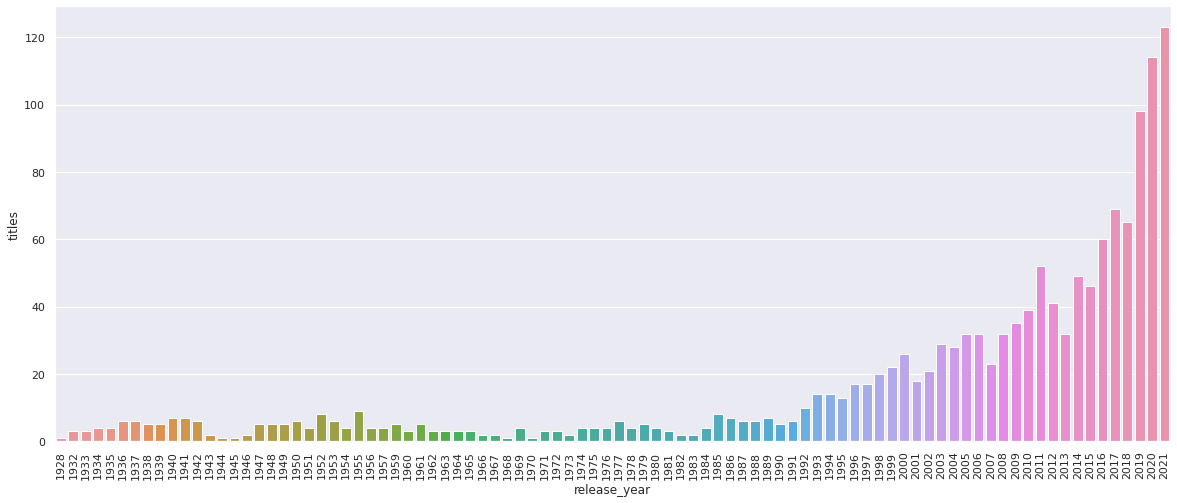

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x = 'release_year',
            y = 'titles',
            data = df2)
 
# Show the plot
sns.set(rc = {'figure.figsize':(20,8)})
plt.xticks(rotation=90)
plt.show()

### Movies to TV Shows ratio

In [24]:
df3 = df.groupby(['type'])['title'].count().reset_index(name='titles')
df3.head()

,type,titles
0,Movie,1051
1,TV Show,393


In [47]:

import numpy as np

df4 = df.groupby(['type','release_year'])['title'].count().reset_index(name='titles')

df5 = pd.pivot_table(df4, values='titles', index=['release_year'],
                    columns=['type'], aggfunc=np.sum)

df5['TV Show'] = df5['TV Show'].fillna(0)

df5.head()

type,Movie,TV Show
release_year,,
1928,1.0,0.0
1932,3.0,0.0
1933,3.0,0.0
1934,4.0,0.0
1935,4.0,0.0


In [48]:
df5.reset_index(inplace=True)
df5.head()

type,release_year,Movie,TV Show
0,1928,1.0,0.0
1,1932,3.0,0.0
2,1933,3.0,0.0
3,1934,4.0,0.0
4,1935,4.0,0.0


<AxesSubplot:xlabel='release_year'>

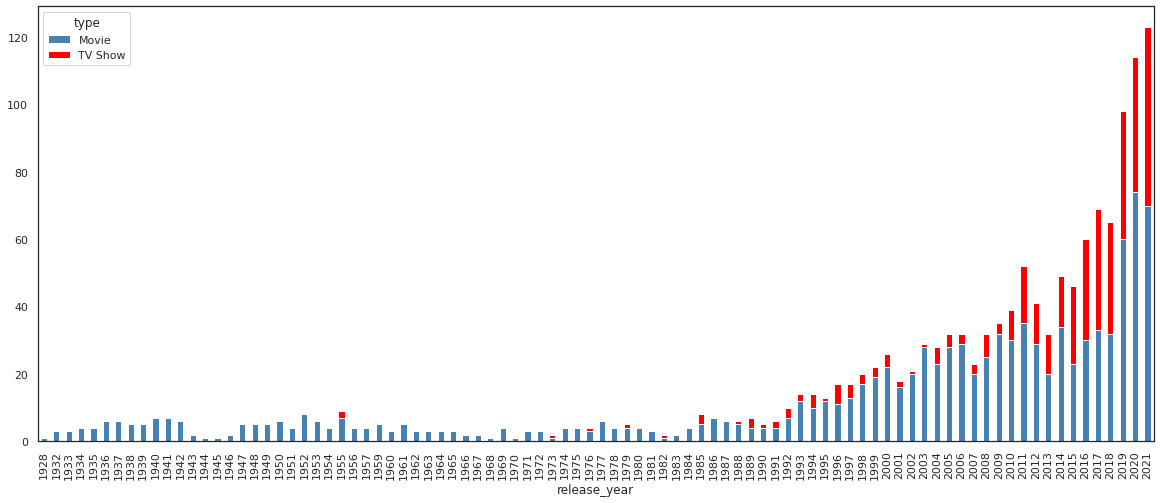

In [49]:
sns.set(style='white')

#create stacked bar chart
df5.set_index('release_year').plot(kind='bar', stacked=True, color=['steelblue', 'red'])

### Which ratings prevail among Disney Plus titles in last 5 years?

In [60]:
df6 = df.groupby(['rating'])['title'].count().reset_index(name='titles')
df6.head()

,rating,titles
0,G,253
1,PG,236
2,PG-13,66
3,TV-14,79
4,TV-G,318


[Text(0, 0, '318'),
 Text(0, 0, '301'),
 Text(0, 0, '253'),
 Text(0, 0, '236'),
 Text(0, 0, '129'),
 Text(0, 0, '79'),
 Text(0, 0, '66'),
 Text(0, 0, '49'),
 Text(0, 0, '13')]

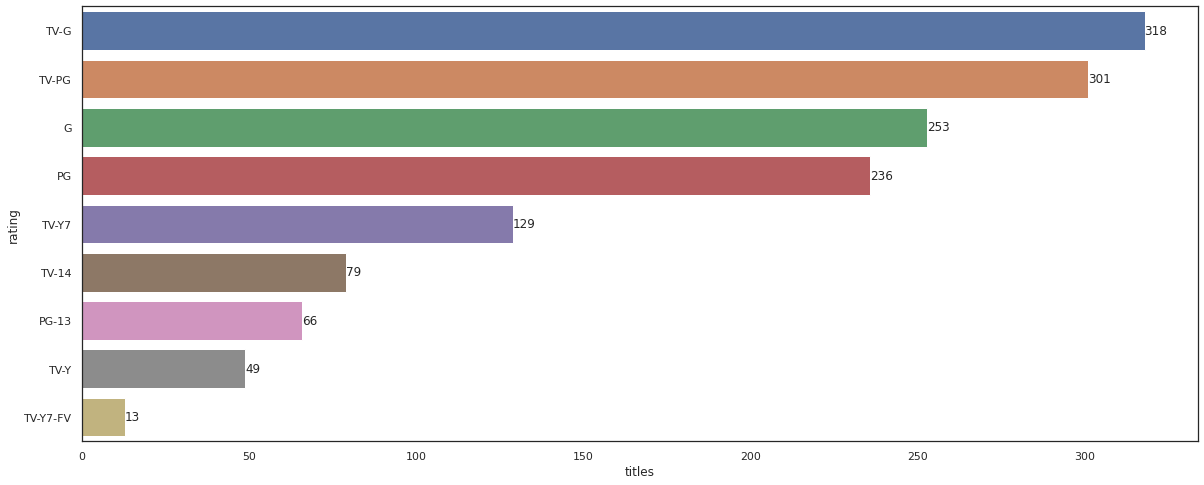

In [67]:
##Build horizontal barchart

df6 = df6[['rating', 'titles']].sort_values("titles", ascending=False)

sns.set_color_codes("pastel")
ax=sns.barplot(x="titles", y="rating",
            data= df6,
            label="Titles by Rating",
            orient = "h")

ax.bar_label(ax.containers[0])

### What is the share of Animated movies/shows on Disney Plus in Y2021

In [117]:
##First, we need to filter for release_year = 2021 and 
##then identify which titles belong to Animation and create a new column with 'Animation'/'Not Animation' values

df7 = df[df.release_year == 2021]
df7.head(10)

,show_id,type,title,director,date_added,release_year,rating,duration,listed_in,description
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
5,s6,Movie,Becoming Cousteau,Liz Garbus,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
6,s7,TV Show,Hawkeye,NaN,"November 24, 2021",2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
14,s15,Movie,America the Beautiful,NaN,"November 12, 2021",2021,TV-PG,2 min,Animals & Nature,"Epic, grand portrait of the land across four r..."
15,s16,Movie,Baymax!,NaN,"November 12, 2021",2021,TV-G,1 min,Animation,“Baymax!” premieres on Disney+ summer 2022.
16,s17,Movie,Ciao Alberto,McKenna Harris,"November 12, 2021",2021,TV-PG,8 min,"Animation, Comedy, Family",Fun-loving sea monster Alberto whole-heartedly...
18,s19,TV Show,Disney Intertwined,NaN,"November 12, 2021",2021,TV-PG,1 Season,"Comedy, Coming of Age, Drama",Allegra is ready to change the past in order t...
23,s24,Movie,Home Sweet Home Alone,Dan Mazer,"November 12, 2021",2021,PG,95 min,"Comedy, Family","Alone for the holidays, Max Mercer will do wha..."
24,s25,Movie,Jungle Cruise,Jaume Collet-Serra,"November 12, 2021",2021,PG-13,129 min,"Action-Adventure, Comedy, Family",Dr. Lily Houghton & skipper Frank Wolff team u...
25,s26,Movie,Limitless with Chris Hemsworth,NaN,"November 12, 2021",2021,TV-14,2 min,Lifestyle,"""Limitless with Chris Hemsworth"" is coming to ..."


In [118]:
df7 = df7[['title', 'listed_in']]
df7.head(10)

,title,listed_in
3,The Queen Family Singalong,Musical
5,Becoming Cousteau,"Biographical, Documentary"
6,Hawkeye,"Action-Adventure, Superhero"
14,America the Beautiful,Animals & Nature
15,Baymax!,Animation
16,Ciao Alberto,"Animation, Comedy, Family"
18,Disney Intertwined,"Comedy, Coming of Age, Drama"
23,Home Sweet Home Alone,"Comedy, Family"
24,Jungle Cruise,"Action-Adventure, Comedy, Family"
25,Limitless with Chris Hemsworth,Lifestyle


In [119]:
##Now we need to create a column to categorize titles

df7['Animation'] = df7['listed_in'].str.contains("animation", case=False)
df7.head()

,title,listed_in,Animation
3,The Queen Family Singalong,Musical,False
5,Becoming Cousteau,"Biographical, Documentary",False
6,Hawkeye,"Action-Adventure, Superhero",False
14,America the Beautiful,Animals & Nature,False
15,Baymax!,Animation,True


In [120]:
##Now we need to create a column to categorize titles

df7['Medium'] = df7['Animation'].apply(lambda x: 'Animation' if x == True else 'Live Action')

df7 = df7[['title', 'Medium']]

df7.head()

,title,Medium
3,The Queen Family Singalong,Live Action
5,Becoming Cousteau,Live Action
6,Hawkeye,Live Action
14,America the Beautiful,Live Action
15,Baymax!,Animation


In [121]:
df7 = df7.groupby(['Medium'])['title'].count().reset_index(name='titles')
df7.head()

,Medium,titles
0,Animation,35
1,Live Action,88


In [128]:
##Convert to %

total = df7.titles.sum()
# print(total)

df7['titles_percentage'] = df7['titles'] / total
df7.head()


,Medium,titles,titles_percentage
0,Animation,35,0.284553
1,Live Action,88,0.715447
